## Plant Pathology

Apples are one of the most important temperate fruit crops in the world. Foliar (leaf) diseases pose a major threat to the overall productivity and quality of apple orchards. The current process for disease diagnosis in apple orchards is based on manual scouting by humans, which is time-consuming and expensive.

Although computer vision-based models have shown promise for plant disease identification, there are some limitations that need to be addressed. Large variations in visual symptoms of a single disease across different apple cultivars, or new varieties that originated under cultivation, are major challenges for computer vision-based disease identification. These variations arise from differences in natural and image capturing environments, for example, leaf color and leaf morphology, the age of infected tissues, non-uniform image background, and different light illumination during imaging etc.

The dataset contains approximately 23,000 high-quality RGB images of apple foliar diseases, including a large expert-annotated disease dataset. This dataset reflects real field scenarios by representing non-homogeneous backgrounds of leaf images taken at different maturity stages and at different times of day under different focal camera settings.

#### Objective

The main objective of this project is to develop machine learning-based models to accurately classify a given leaf image from the test dataset to a particular disease category, and to identify an individual disease from multiple disease symptoms on a single leaf image.

#### Resources

[Thapa, Ranjita; Zhang, Kai; Snavely, Noah; Belongie, Serge; Khan, Awais. The Plant Pathology Challenge 2020 data set to classify foliar disease of apples. Applications in Plant Sciences, 8 (9), 2020.](https://bsapubs.onlinelibrary.wiley.com/doi/10.1002/aps3.11390)

### Data Information

The study involved capturing high-quality RGB images of various apple foliar disease symptoms during the 2019 growing season. The images were sourced from commercially grown cultivars in an unsprayed apple orchard at Cornell AgriTech in Geneva, New York. The data collection included the use of a Canon Rebel T5i DSLR and smartphones, introducing variability in illumination, angle, surface, and noise conditions.

Key characteristics of the dataset include:

1. **Disease Types:**
   - Cedar apple rust (A)
   - Apple scab (B)
   - Alternaria leaf spot (C)
   - Frogeye leaf spot (C)
   - Healthy leaves (D)
   
![Figure](https://bsapubs.onlinelibrary.wiley.com/cms/asset/9b870fb2-8c97-471f-9589-6baade4c053a/aps311390-fig-0003-m.jpg)


2. **Complexities in the Dataset:**
   - Imbalanced data set with different disease categories.
   - Non-homogeneous image backgrounds.
   - Images captured at different times of the day.
   - Images from plants at different maturity stages.
   - Images displaying multiple diseases on the same leaf.
   - Images taken using different focus settings.


3. **Data Annotation:**
   - An annotated disease dataset was created by manual annotation.
   - Annotation focused on cedar apple rust, apple scab, and healthy leaves.
   - Symptomatic features unique to these diseases were used for annotation.
   - Confirmation of annotations was done by an expert plant pathologist.
   - Particularly challenging cases, such as distinguishing between Alternaria leaf spot and frogeye leaf spot, were confirmed by the pathologist.
   - Complex disease symptoms resulting from multiple diseases with similar appearances on the same leaf were also addressed.


4. **Data Split:**
   - The dataset was randomly split into training (80%) and stratified test sets (20%).
   - Ensured representation of all four disease categories in both training and test sets.





#### Files

**train.csv** - the training set metadata.

- image - the image ID.

- labels - the target classes, a space delimited list of all diseases found in the image. Unhealthy leaves with too many diseases to classify visually will have the complex class, and may also have a subset of the diseases identified.

**train_images** - The training set images.

**test_images** - The test set images. This competition has a hidden test set: only three images are provided here as samples while the remaining 5,000 images will be available to your notebook once it is submitted.

### Import Libraries

In [27]:
import pandas as pd      # for data manipulation and analysis
import numpy as np       # for numerical computing
import matplotlib.pyplot as plt     # for data visualization
import matplotlib.dates as mdates   
import seaborn as sns    # for advanced data visualization
import sklearn           # for machine learning algorithms
import os
import zipfile
from sklearn.feature_selection import mutual_info_classif
import statsmodels.api as sm        # for statistical models and tests
import scipy.stats as stats         # for scientific computing and statistics
import random     
from sklearn.metrics import make_scorer
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from pycaret.clustering import *
#from datetime import datetime

# OpenCV for Computer Vision
import cv2
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from yellowbrick.cluster import KElbowVisualizer
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)

from termcolor import colored
import pylab
from sklearn.impute import SimpleImputer
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error

# Models
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
#from sklearn.linear_model import LogisticRegression
#import xgboost as xgb

### Auxiliar Functions

In [18]:
# Function to print main info about the dataset
def ds_info(df):
    print(colored('SIZE' , 'blue', attrs=['bold', 'dark']))
    print(df.size)
    print(colored('\nSHAPE' , 'blue', attrs=['bold', 'dark']))
    print(df.shape)
    print(colored('\nINFO' , 'blue', attrs=['bold', 'dark']))
    print(df.info())
    print(colored('\nNULL VALUES' , 'blue', attrs=['bold', 'dark']))
    print(df.isnull().sum())
    print(colored('\nHEAD' , 'blue', attrs=['bold', 'dark']))
    print(df.head())
    print(colored('\nTAIL' , 'blue', attrs=['bold', 'dark']))
    print(df.tail())
    print(colored('\nDESCRIBE - Numerical' , 'blue', attrs=['bold', 'dark']))
    print(df.describe())
    print(colored('\nDESCRIBE - Categorical' , 'blue', attrs=['bold', 'dark']))
    print(df.describe(include='object'))
    
    print(colored('\nUNIQUE ENTRIES IN EACH NUMERICAL COLUMN' , 'blue', attrs=['bold', 'dark']))
    # Get number of unique entries in each column with numerical data
    num_cols = [col for col in df.columns if df[col].dtype != "object"]
    num_nunique = list(map(lambda col: df[col].nunique(), num_cols))    
    dn = dict(zip(num_cols, num_nunique))
    # Print number of unique entries by column, in ascending order
    print(sorted(dn.items(), key=lambda x: x[1]))
    
    print(colored('\nUNIQUE ENTRIES IN EACH CATEGORICAL COLUMN' , 'blue', attrs=['bold', 'dark']))
    # Get number of unique entries in each column with categorical data
    object_cols = [col for col in df.columns if df[col].dtype == "object"]
    object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
    dc = dict(zip(object_cols, object_nunique))
    # Print number of unique entries by column, in ascending order
    print(sorted(dc.items(), key=lambda x: x[1]))

# Function to visualize a sample of images
def visualize_sample(path,image_ids, labels):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, labels)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(os.path.join(path, image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(f"Class: {label}", fontsize=12)
        plt.axis("off")
    plt.show()

# Function to loads an image and returns it resized
def load_image(image_id, image_size=(200,200)):
    file_path = image_id
    image = cv2.imread(train_image_path + file_path,1)
    image = cv2.resize(image, image_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Function to visualize images by type of disease 
def show_cond(cond):
  cond_list = train_image_path[train_data[cond]==1]
  cols, rows = 3,3  
  fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows*10/3))
  for i in range(cols*rows):
    if(i>=cond_list.size):
      break
    ax[int(i/cols), int(i%rows)].imshow(cond_list.iloc[i])
  plt.show()
  return (cond_list)

### Import Data and Load Images

In [22]:
# Set the file path and name
train_path = './data/train.csv'
train_data = pd.read_csv(train_path)

# Specify the path to the zip file
zip_path = 'C:/Users/peter/Downloads/plant-pathology-2021-fgvc8.zip'  # Zip file path

# Path for the images
train_image_path = 'C:/Users/peter/Downloads/Plant-pathology-2021-fgvc8/train_images'
test_image_path = 'C:/Users/peter/Downloads/Plant-pathology-2021-fgvc8/test_images'

In [20]:
# Load all of the images
#train_images = train_data["image"].apply(load_image, args=((100,100),))

# Build the dataset of current images
#current_train_data = train_data.loc[train_images.index]
#targets = get_target_array(current_train_data)

### Exploratory Data Analisys

Let's start showing information about the dataset train_data:

In [5]:
ds_info(train_data)

SIZE
37264

SHAPE
(18632, 2)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18632 entries, 0 to 18631
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   18632 non-null  object
 1   labels  18632 non-null  object
dtypes: object(2)
memory usage: 291.2+ KB
None

NULL VALUES
image     0
labels    0
dtype: int64

HEAD
                  image                           labels
0  800113bb65efe69e.jpg                          healthy
1  8002cb321f8bfcdf.jpg  scab frog_eye_leaf_spot complex
2  80070f7fb5e2ccaa.jpg                             scab
3  80077517781fb94f.jpg                             scab
4  800cbf0ff87721f8.jpg                          complex

TAIL
                      image                   labels
18627  fffb900a92289a33.jpg                  healthy
18628  fffc488fa4c0e80c.jpg                     scab
18629  fffc94e092a59086.jpg                     rust
18630  fffe105cf6808292.jpg  scab frog_eye_leaf_sp

**Summary:**
- The train dataset contain **18632** lines, and only two variables, **image** and **labels**. As we will see later, it doesn't mean there are 18632 images in the dataset, because some images have more than one classification.
- It doesn't have Null values, and the labels variable is organized in 12 categories    

#### Counting labels and distribuition

In [6]:
train_data['labels'].value_counts()

scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: labels, dtype: int64

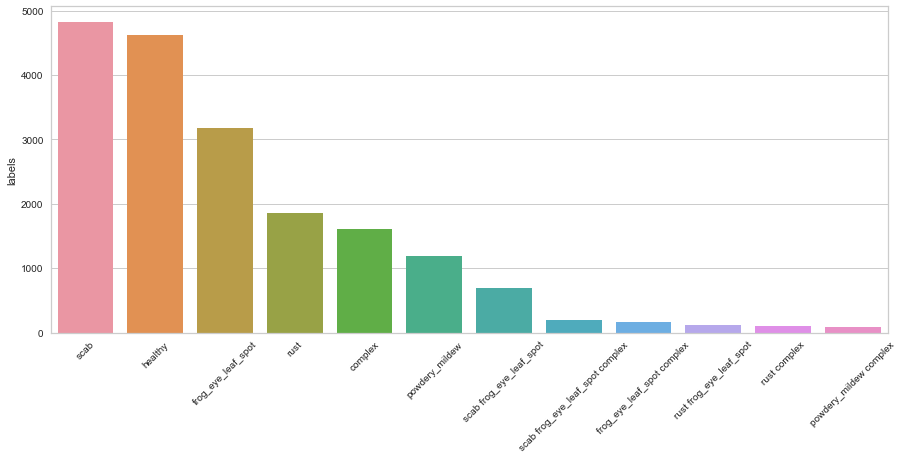

In [7]:
plt.figure(figsize=(15,6))
labels = sns.barplot(train_data.labels.value_counts().index,train_data.labels.value_counts())
for item in labels.get_xticklabels():
    item.set_rotation(45)

In [8]:
source = train_data['labels'].value_counts()

fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Label distribution')
fig.show()

**Summary:**

The dataset exhibits an imbalance, with certain categories constituting less than 1%, whereas scab and healthy categories comprise around 25%. Addressing this imbalance will necessitate the implementation of a suitable strategy.

#### Visualizing the Plant Pathology 

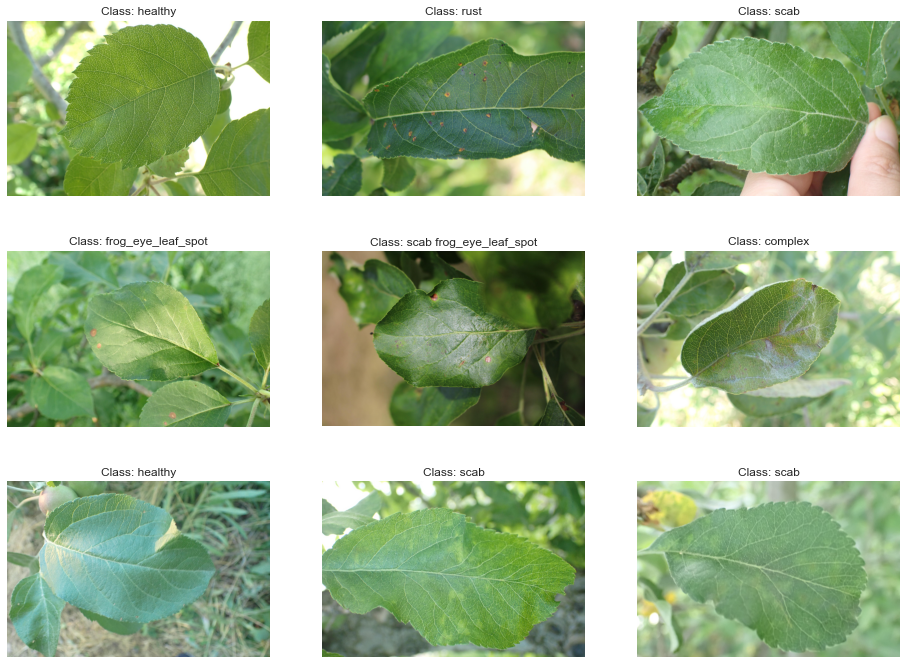

In [13]:
# Create a temporary dataframe with 9 pictures
temp_df = train_data.sample(9)
image_id = temp_df["image"].values  
labels = temp_df["labels"].values

visualize_sample(train_image_path, image_id,labels)

In [30]:
#scab_list=show_cond('scab')

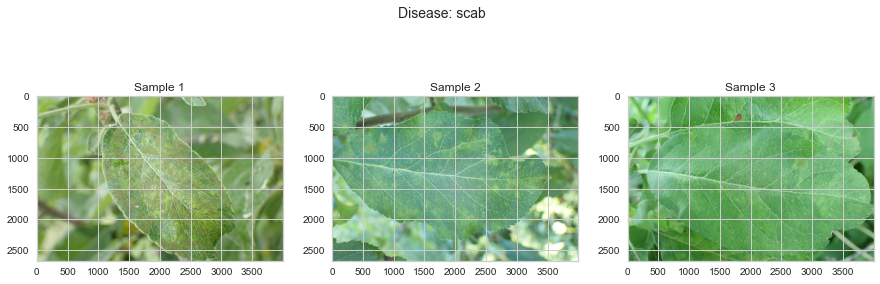

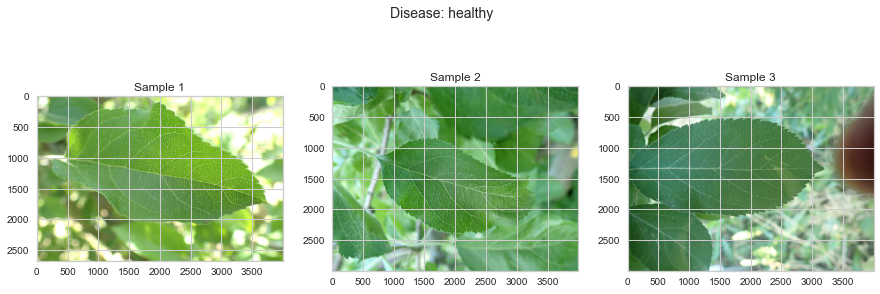

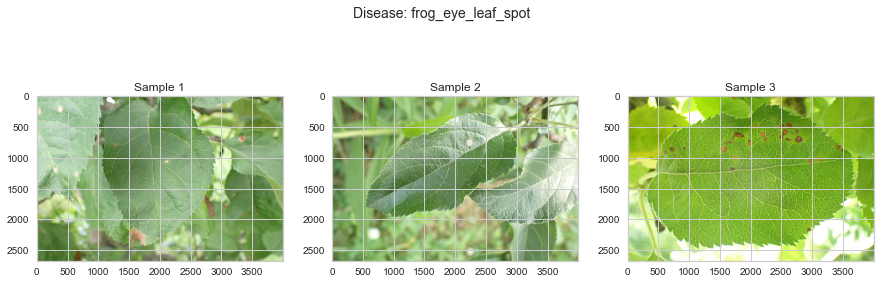

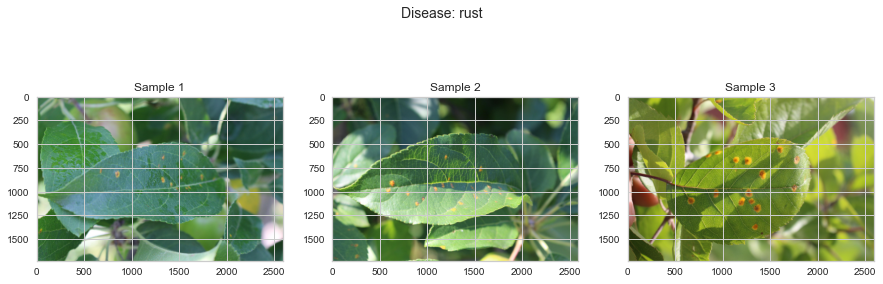

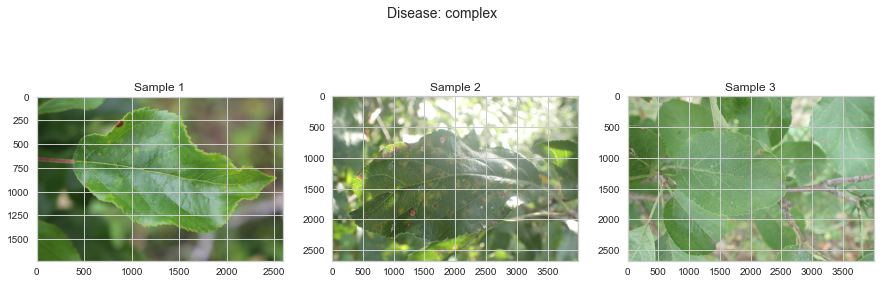

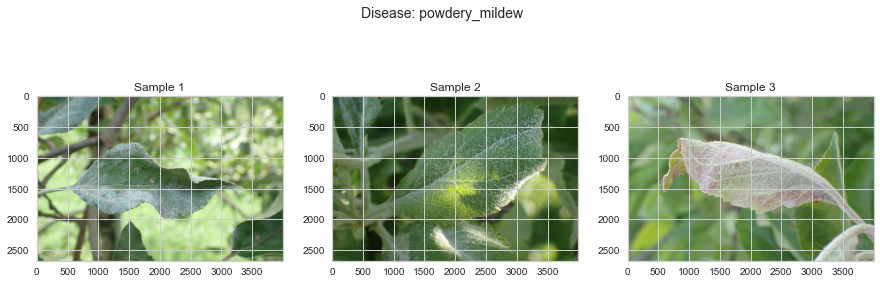

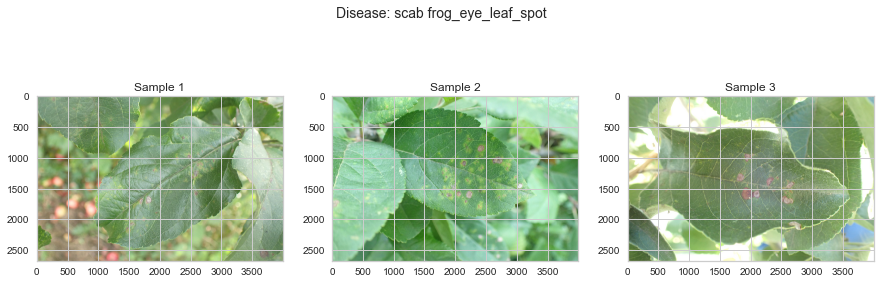

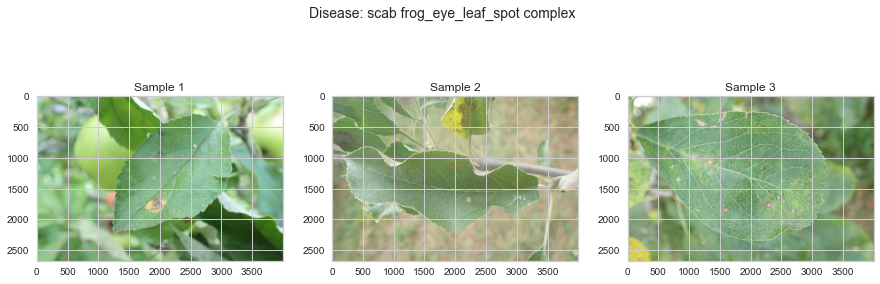

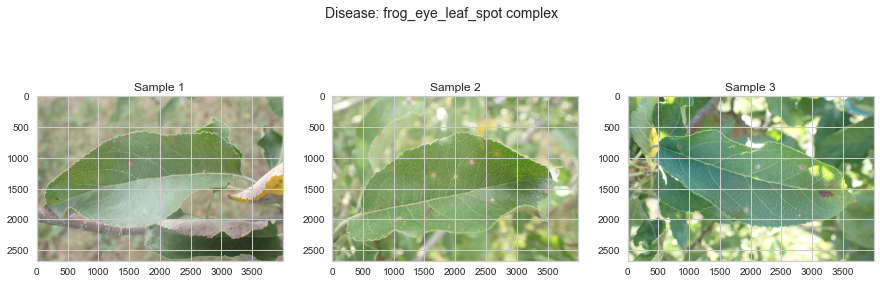

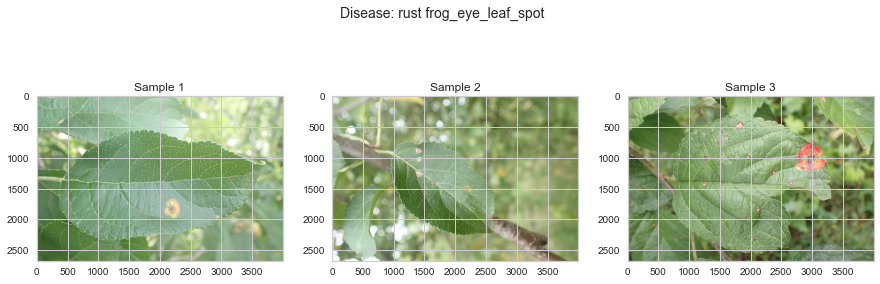

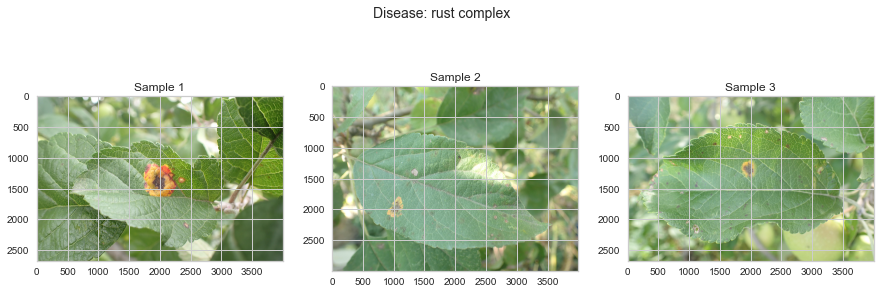

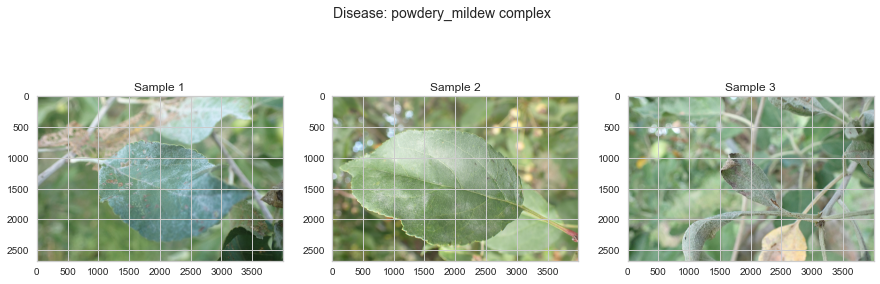

In [29]:
# Create a ZipFile object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Group images by label
    grouped_images = train_data.groupby('labels')['image'].apply(list)

    # Define the diseases you're interested in
    diseases_of_interest = ['scab', 
                            'healthy', 
                            'frog_eye_leaf_spot', 
                            'rust', 
                            'complex', 
                            'powdery_mildew', 
                            'scab frog_eye_leaf_spot', 
                            'scab frog_eye_leaf_spot complex', 
                            'frog_eye_leaf_spot complex', 
                            'rust frog_eye_leaf_spot',
                            'rust complex', 
                            'powdery_mildew complex']  # Diseases to plot

    # Display three random samples for each disease
    for disease in diseases_of_interest:
        # Get three random samples for the current disease
        samples = random.sample(grouped_images[disease], min(3, len(grouped_images[disease]))) # list containing three unique image names for the given disease

        # Plot the images in a single row
        plt.figure(figsize=(15, 5))
        for i, sample in enumerate(samples, 1):
            # Read the image from the zip file
            with zip_ref.open(f'train_images/{sample}') as file:
                image_bytes = file.read()
                image_np = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), 1)

            # Plot each image
            plt.subplot(1, 3, i)
            plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
            plt.title(f'Sample {i}')

        # Set a common title for the row
        plt.suptitle(f'Disease: {disease}', fontsize=14)
        plt.show()